# **Feature Selection, Classification, and SMOTE Handling**

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.feature_selection import f_classif  # For ANOVA test-based feature selection
from imblearn.over_sampling import SMOTE


# **Data Preprocessing**

In [ ]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
import pandas as pd

# Load the dataset (update the file path as needed)
df = pd.read_csv('/content/creditcard (1).csv')  # Adjust path accordingly

# Separate features and target variable
X = df.drop(columns=['Class', 'Amount', 'Time'])  # Adjust according to your dataset
y = df['Class']

# Before applying SMOTE, handle missing values in 'y' (if any)
# Option 1: Remove rows with missing values in 'y'
#df = df.dropna(subset=['Class']) #You already did this, but it might not be in the right place
#X = df.drop(columns=['Class', 'Amount', 'Time'])
#y = df['Class']

# Option 2: Impute missing values in 'y' (e.g., with the most frequent value)
#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(strategy='most_frequent') #For classification problems use most_frequent or constant.
#y = imputer.fit_transform(y.values.reshape(-1, 1))
#y = pd.Series(y.flatten()) #Convert back into a pandas series

# Count the number of fraud instances (1s)
fraud_count = y.value_counts()[1]

# Define the desired number of fraud instances (50,000)
desired_fraud_count = 50000

# Apply SMOTE to oversample the fraud (1) class to the desired number
# Use a dictionary for sampling_strategy to specify the desired count for the minority class (1)
smote = SMOTE(sampling_strategy={1: desired_fraud_count}, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after SMOTE
print("\nClass distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())

# Basic Data Info
print("Data Loaded:", df.shape)
df.info()

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Drop rows where target variable 'Class' is missing (fraud detection target column)
#df.dropna(subset=['Class'], inplace=True) #Moved up and modified.

print(f"Data Shape After Cleaning: {df.shape}")

# Show a sample of the data
df.head()


Class distribution after SMOTE:
Class
0    284315
1     50000
Name: count, dtype: int64
Data Loaded: (284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# **Data Balancing using SMOTE with Visualization and Class Distribution Analysis**

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (update the file path as needed)
df = pd.read_csv('/content/creditcard (1).csv')  # Adjust path accordingly

# Separate the features and target variable
X = df.drop(columns=['Class'])
y = df['Class']

# Get the number of normal (0) and fraud (1) samples
normal_count = y.value_counts()[0]  # Normal class (0)
fraud_count = y.value_counts()[1]   # Fraud class (1)

# Calculate the desired sampling strategy (fraud should be 50,000)
sampling_strategy = 50000 / normal_count

# Apply SMOTE to oversample the fraud (1) class to the desired number
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine the resampled features and target into a new dataframe
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Class'] = y_resampled

# Check the class distribution after SMOTE
'''plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df_resampled, palette='viridis')
plt.title('Class Distribution (Fraud vs Normal Transactions - After SMOTE)', fontsize=14)
plt.xlabel('Class (0: Normal, 1: Fraud)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()'''

# Show a sample of the resampled dataset
print(df_resampled.head())

# Optionally, check the final class distribution
print("\nClass distribution in the resampled dataset:")
print(df_resampled['Class'].value_counts())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

# **Exploratory Data Analysis**

<ipython-input-10-179bc272bc92>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=df, palette='viridis')
<ipython-input-10-179bc272bc92>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Time', data=df, palette='viridis')


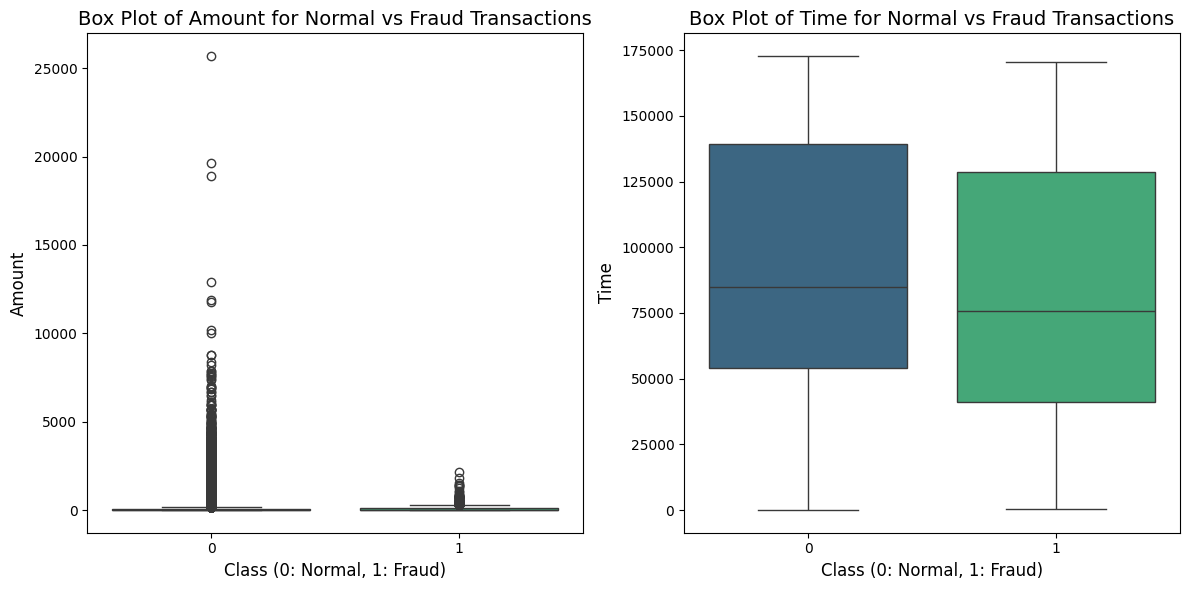

In [ ]:
# Box plots for 'Amount' and 'Time' for normal vs fraud transactions
plt.figure(figsize=(12, 6))

# Box plot for 'Amount'
plt.subplot(1, 2, 1)
sns.boxplot(x='Class', y='Amount', data=df, palette='viridis')
plt.title('Box Plot of Amount for Normal vs Fraud Transactions', fontsize=14)
plt.xlabel('Class (0: Normal, 1: Fraud)', fontsize=12)
plt.ylabel('Amount', fontsize=12)

# Box plot for 'Time'
plt.subplot(1, 2, 2)
sns.boxplot(x='Class', y='Time', data=df, palette='viridis')
plt.title('Box Plot of Time for Normal vs Fraud Transactions', fontsize=14)
plt.xlabel('Class (0: Normal, 1: Fraud)', fontsize=12)
plt.ylabel('Time', fontsize=12)

plt.tight_layout()
plt.show()


# **Transaction Amount Distribution Analysis**

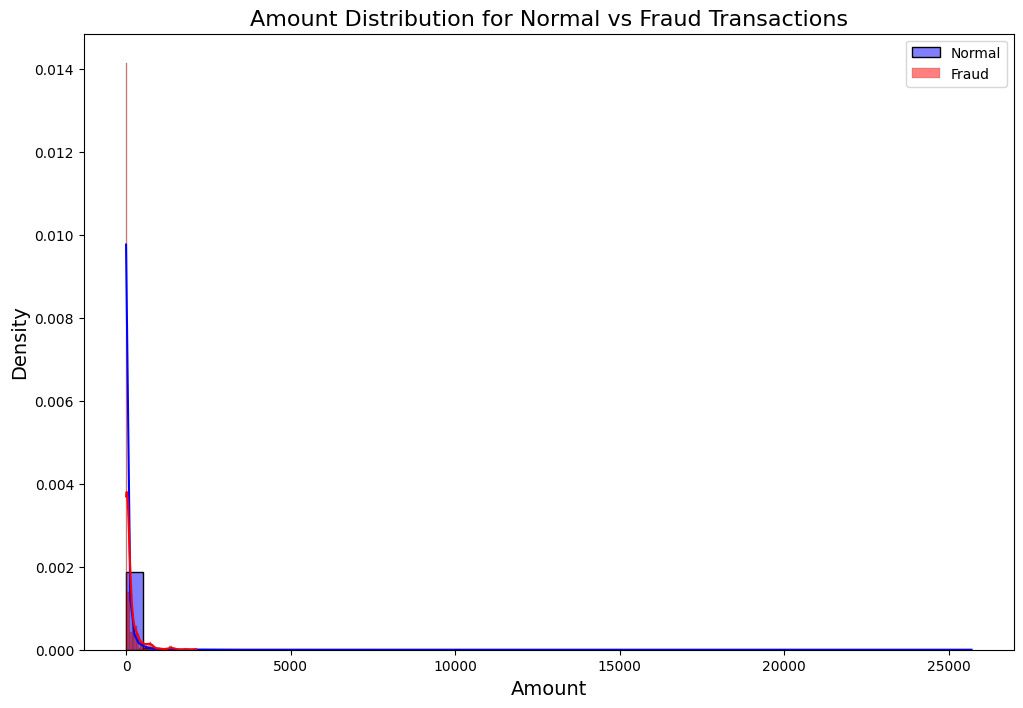

In [ ]:
# Ensure the dataset is loaded and classes are defined
df_class_0 = df[df.Class == 0]  # Normal transactions (Class 0)
df_class_1 = df[df.Class == 1]  # Fraud transactions (Class 1)

# Histogram for normal (Class 0) vs fraud (Class 1) transactions for 'Amount'
plt.figure(figsize=(12, 8))

# Plotting for Normal Transactions (Class 0)
sns.histplot(df_class_0['Amount'], kde=True, color='blue', label='Normal', stat='density', bins=50, alpha=0.5)

# Plotting for Fraud Transactions (Class 1)
sns.histplot(df_class_1['Amount'], kde=True, color='red', label='Fraud', stat='density', bins=50, alpha=0.5)

# Title and labels
plt.title('Amount Distribution for Normal vs Fraud Transactions', fontsize=16)
plt.xlabel('Amount', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Add a legend
plt.legend()

# Show plot
plt.show()


# **Feature Correlation Analysis**

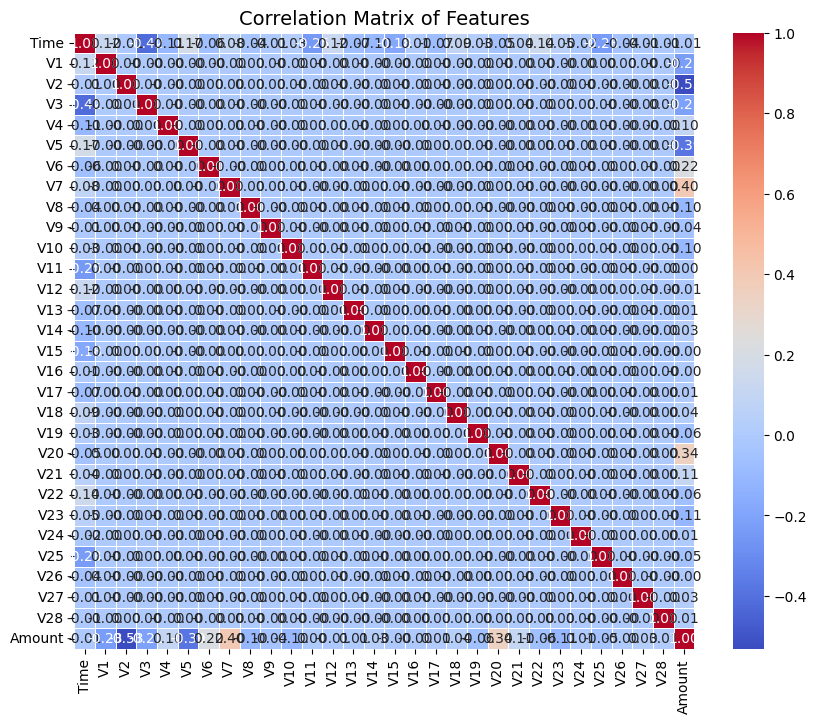

In [ ]:
# Correlation Matrix
correlation_matrix = df.drop(columns=['Class']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features', fontsize=14)
plt.show()

# **Mutual Information and ANOVA F-Test Analysis**

In [ ]:
# Feature selection using Mutual Information (for classification problems)
X = df.drop(columns=['Class'])
y = df['Class']

# Using Mutual Information for feature selection
feature_selector_mutual_info = SelectKBest(score_func=mutual_info_classif, k=15)  # Top 15 features
X_selected = feature_selector_mutual_info.fit_transform(X, y)

# Get the names of the selected features
selected_features_mutual_info = X.columns[feature_selector_mutual_info.get_support()]
print("Selected Features (Mutual Information):", selected_features_mutual_info)

# Feature selection using ANOVA F-test (for classification problems)
feature_selector_anova = SelectKBest(score_func=f_classif, k=15)  # Top 15 features
X_selected_anova = feature_selector_anova.fit_transform(X, y)

# Get the names of the selected features
selected_features_anova = X.columns[feature_selector_anova.get_support()]
print("Selected Features (ANOVA F-test):", selected_features_anova)


Selected Features (Mutual Information): Index(['V2', 'V3', 'V4', 'V5', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16',
       'V17', 'V18', 'V21', 'V27'],
      dtype='object')
Selected Features (ANOVA F-test): Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18'],
      dtype='object')


# **Kernel Density Estimation (KDE) for Feature Distribution**

<ipython-input-14-80642b59f9ff>:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_class_0[col], label="Class 0", shade=True, color='blue', alpha=0.5, ax=ax[idx])
<ipython-input-14-80642b59f9ff>:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_class_1[col], label="Class 1", shade=True, color='red', alpha=0.5, ax=ax[idx])
<ipython-input-14-80642b59f9ff>:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_class_0[col], label="Class 0", shade=True, color='blue', alpha=0.5, ax=ax[idx])
<ipython-input-14-80642b59f9ff>:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will beco

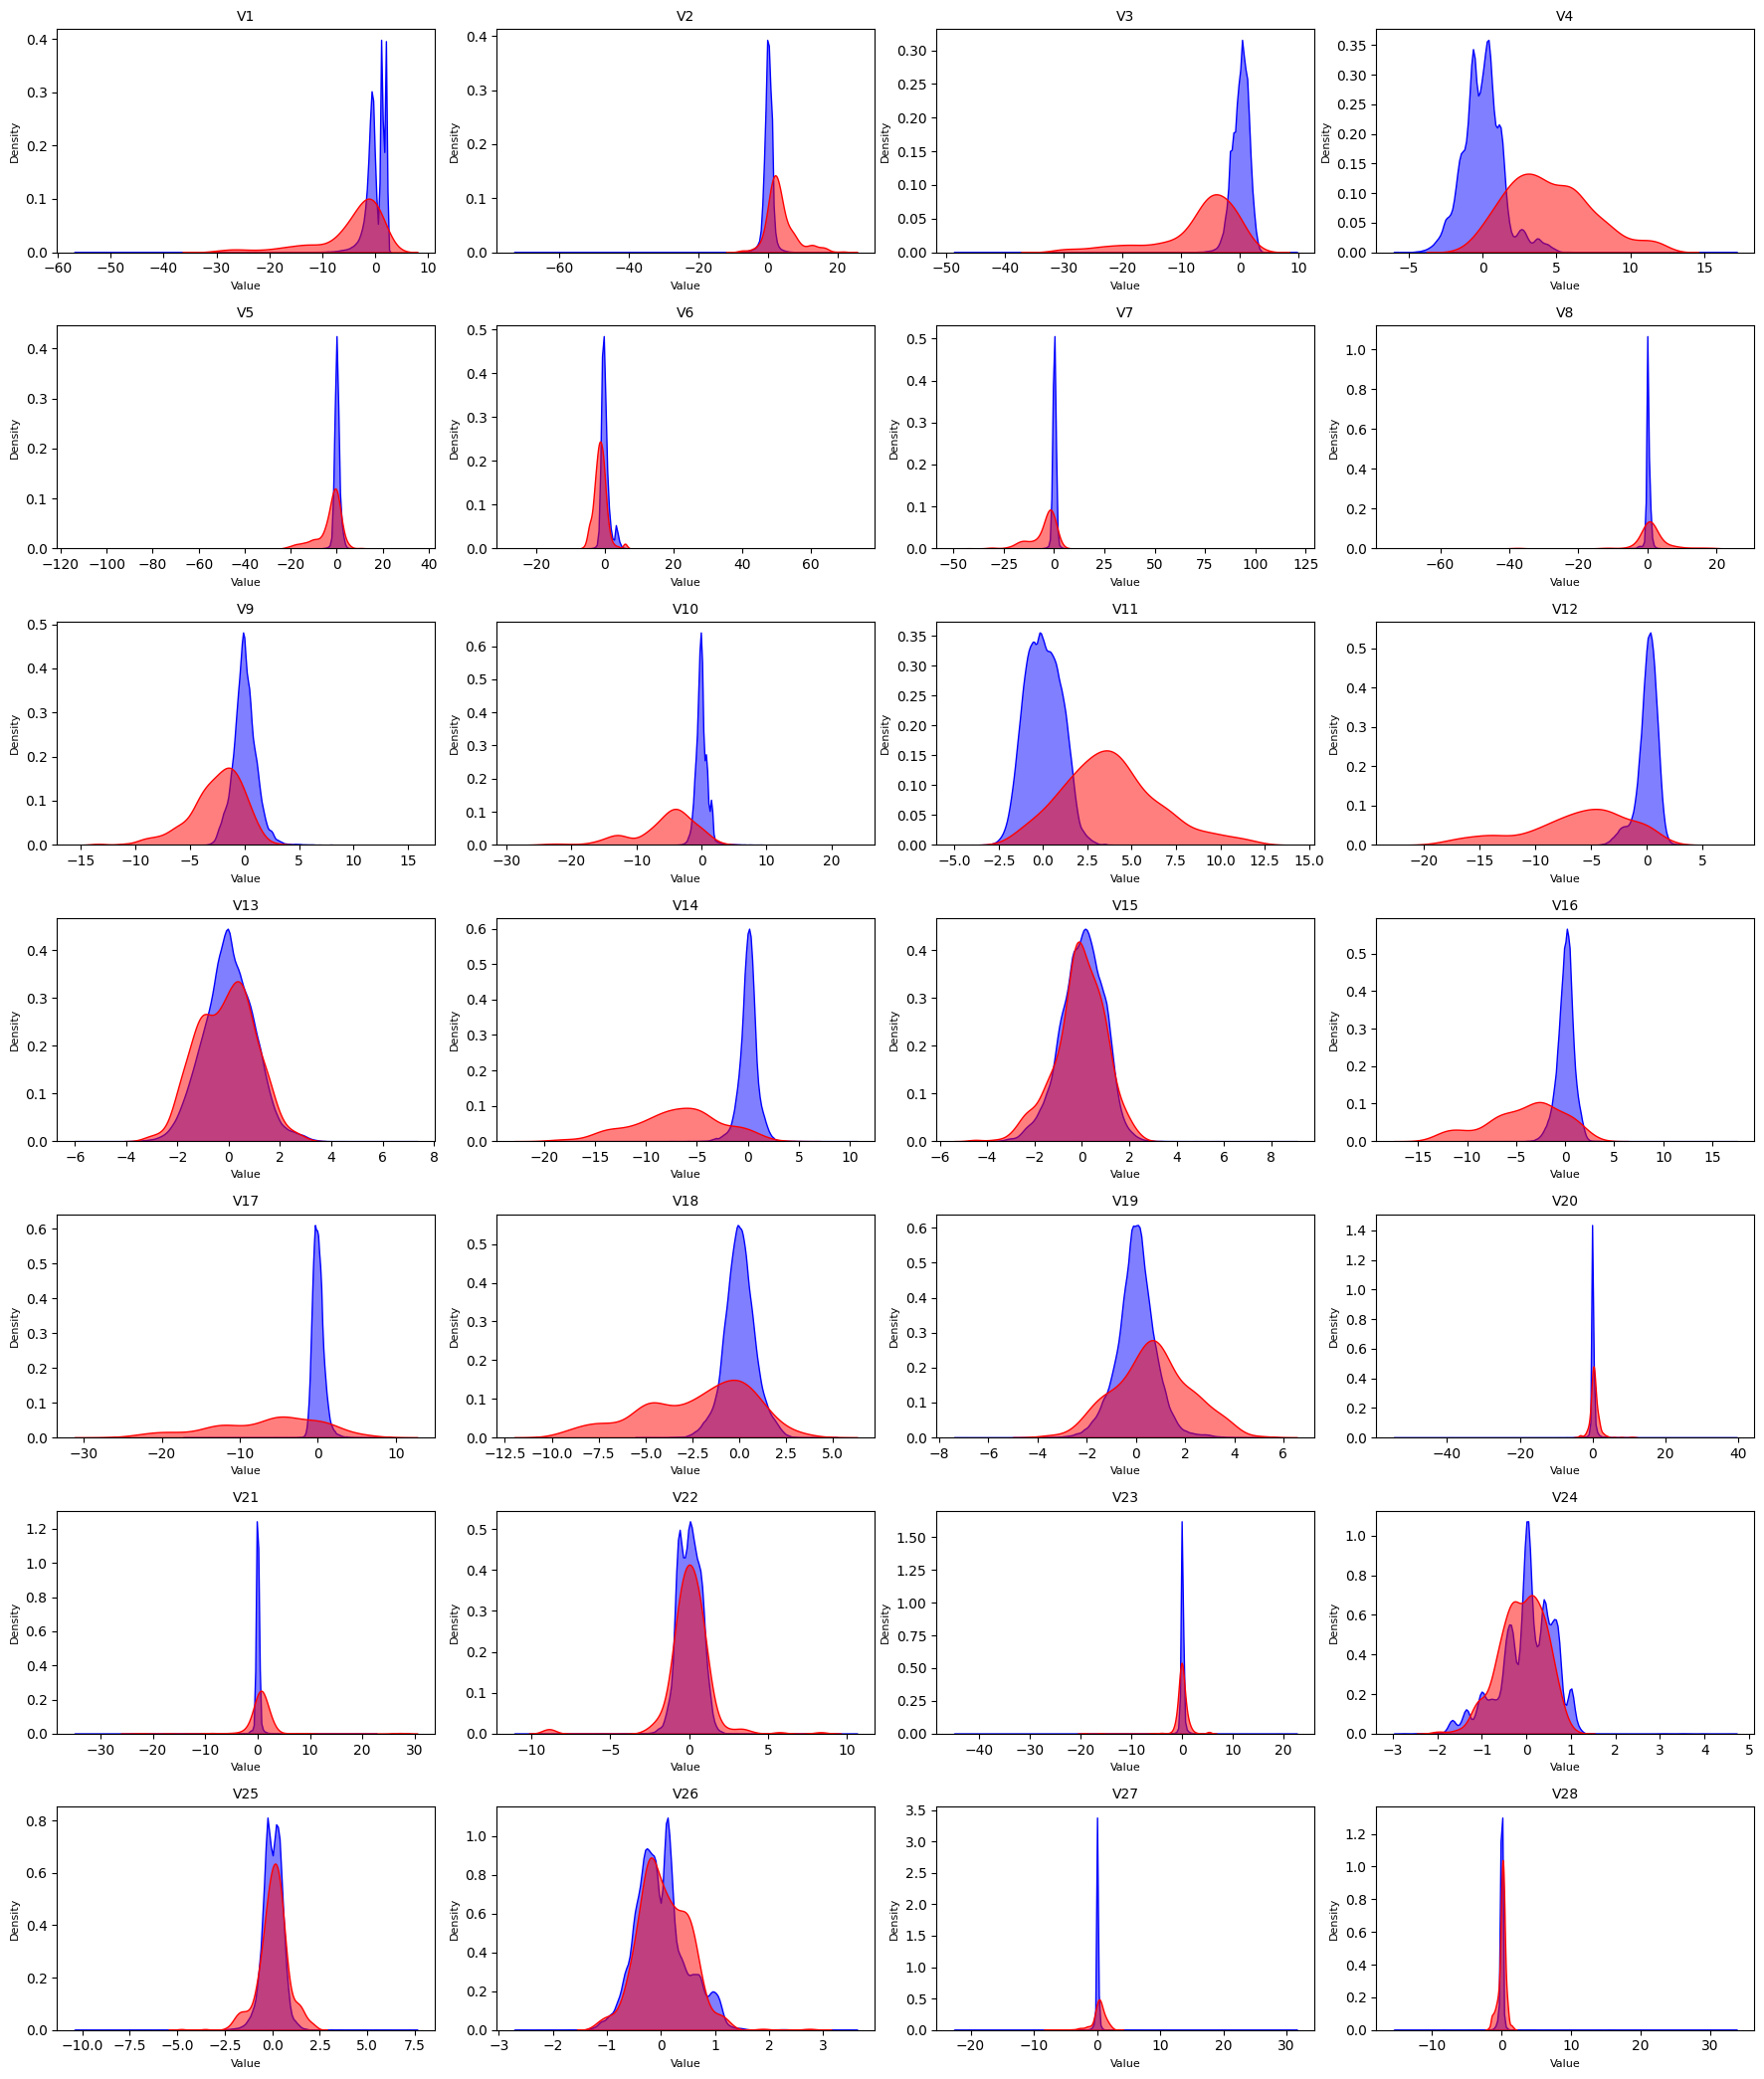

In [ ]:
# Prepare the data for class distribution
df_class_0 = df[df.Class == 0]  # Normal transactions (Class 0)
df_class_1 = df[df.Class == 1]  # Fraud transactions (Class 1)

# Column names for features (excluding 'Class', 'Amount', 'Time')
column_names = df.drop(['Class', 'Amount', 'Time'], axis=1).columns

# Calculate the number of plots and dynamically adjust rows and columns for the subplot grid
num_plots = len(column_names)
ncols = 4  # Set the number of columns you want
nrows = (num_plots // ncols) + (num_plots % ncols > 0)  # Calculate number of rows needed

# Create a grid of subplots with the dynamically calculated number of rows and columns
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, nrows * 3))
fig.subplots_adjust(hspace=1, wspace=1)

# Flatten the axis array for easy indexing
ax = ax.flatten()

# Loop over each column to plot KDEs
for idx, col in enumerate(column_names):
    # Plot KDE for Class 0 (Normal) and Class 1 (Fraud)
    sns.kdeplot(df_class_0[col], label="Class 0", shade=True, color='blue', alpha=0.5, ax=ax[idx])
    sns.kdeplot(df_class_1[col], label="Class 1", shade=True, color='red', alpha=0.5, ax=ax[idx])

    # Set the title and labels for each subplot
    ax[idx].set_title(f'{col}', fontsize=10)
    ax[idx].set_xlabel('Value', fontsize=8)
    ax[idx].set_ylabel('Density', fontsize=8)

# Tight layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


# **Feature Scaling and Train-Test Split**

In [ ]:
# Scaling the selected features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")


Training set size: (213605, 15), Test set size: (71202, 15)


# **Model Comparison for Fraud Detection: Evaluation of Multiple Classifiers**


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.83      0.60      0.70       123

    accuracy                           1.00     71202
   macro avg       0.92      0.80      0.85     71202
weighted avg       1.00      1.00      1.00     71202


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.96      0.78      0.86       123

    accuracy                           1.00     71202
   macro avg       0.98      0.89      0.93     71202
weighted avg       1.00      1.00      1.00     71202


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.91      0.75      0.82       123

    accuracy                           1.00     71202
   macro

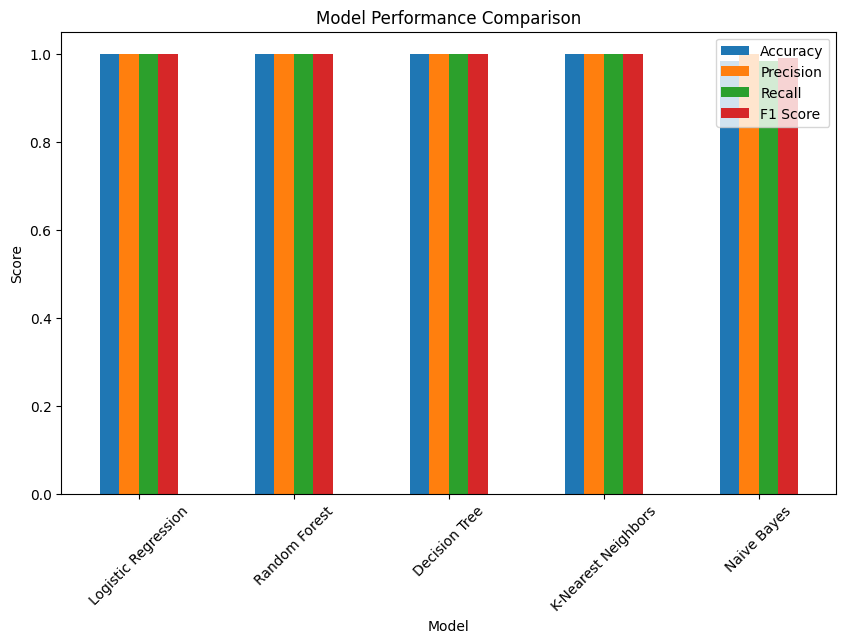

In [ ]:
# Initialize models to test
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=10, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=10),
    'Naive Bayes': GaussianNB()
}

# Store results for each model
results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

    # Classification Report and Confusion Matrix for each model
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix Heatmap
    #cm = confusion_matrix(y_test, y_pred)
    #sns.heatmap(cm, annot=True, fmt='g', cmap="crest")
    #plt.title(f'{name} - Confusion Matrix')
    #plt.xlabel('Predicted')
    #plt.ylabel('Actual')
    #plt.show()

# Summary of Model Performance
results_df = pd.DataFrame(results)
print("\nModel Performance Summary:")
print(results_df)

# Plotting Model Performance
results_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()


# **Bagging Classifier for Fraud Detection**

Bagging Classifier Model Performance:
Accuracy: 0.9996067526193084
Precision: 0.9995947962160242
Recall: 0.9996067526193084
F1 Score: 0.9995912545896625

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.95      0.81      0.88       123

    accuracy                           1.00     71202
   macro avg       0.98      0.91      0.94     71202
weighted avg       1.00      1.00      1.00     71202


Model Performance Summary with Bagging:
                     Model  Accuracy  Precision    Recall  F1 Score
0      Logistic Regression  0.999101   0.999021  0.999101  0.999029
1            Random Forest  0.999565   0.999552  0.999565  0.999542
2            Decision Tree  0.999438   0.999411  0.999438  0.999411
3      K-Nearest Neighbors  0.999452   0.999427  0.999452  0.999421
4              Naive Bayes  0.983385   0.998143  0.983385  0.990156
5  Bagging (Decision Tree)  0.999607   0.999595

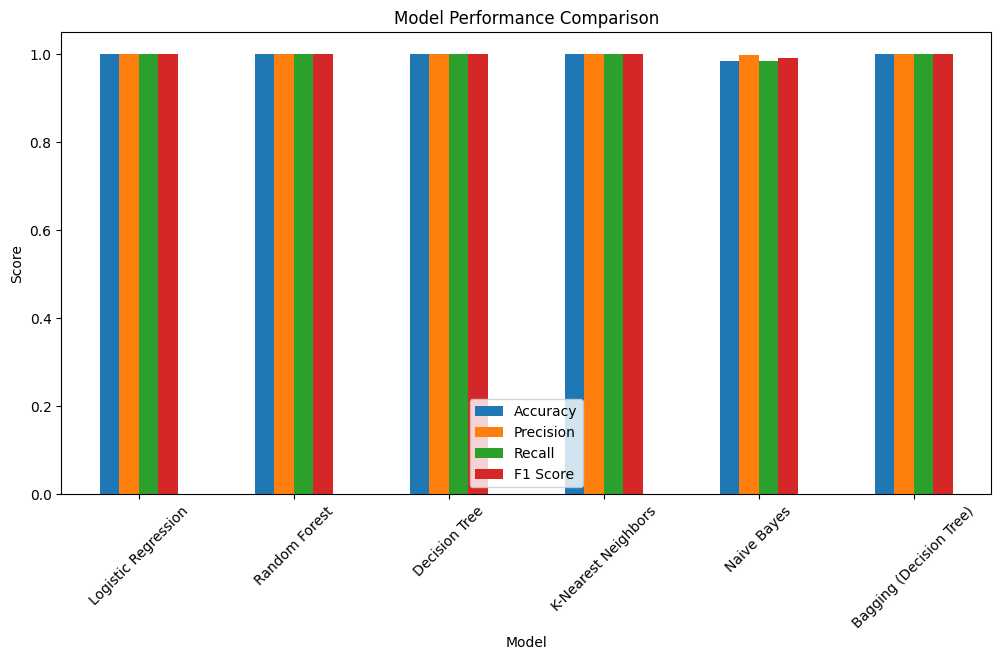

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Initialize a Decision Tree as the base estimator for Bagging
estimator = DecisionTreeClassifier(max_depth=10, random_state=42)
bagging_model = BaggingClassifier(estimator=estimator, n_estimators=100, random_state=42, n_jobs=-1)

# Fit the Bagging model on the training data
bagging_model.fit(X_train, y_train)

# Predict on the test set
y_pred_bagging = bagging_model.predict(X_test)

# Evaluation metrics for Bagging
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
precision_bagging = precision_score(y_test, y_pred_bagging, average='weighted')
recall_bagging = recall_score(y_test, y_pred_bagging, average='weighted')
f1_bagging = f1_score(y_test, y_pred_bagging, average='weighted')

print("Bagging Classifier Model Performance:")
print(f"Accuracy: {accuracy_bagging}")
print(f"Precision: {precision_bagging}")
print(f"Recall: {recall_bagging}")
print(f"F1 Score: {f1_bagging}")
#print("\nClassification Report:")
#print(classification_report(y_test, y_pred_bagging))

# Confusion Matrix for Bagging Model
#cm_bagging = confusion_matrix(y_test, y_pred_bagging)
#plt.figure(figsize=(6, 4))
##sns.heatmap(cm_bagging, annot=True, fmt='g', cmap="Blues")
#plt.title('Bagging - Confusion Matrix')
#plt.xlabel('Predicted')
#plt.ylabel('Actual')
#plt.show()

# Comparison with other models
results.append({
    'Model': 'Bagging (Decision Tree)',
    'Accuracy': accuracy_bagging,
    'Precision': precision_bagging,
    'Recall': recall_bagging,
    'F1 Score': f1_bagging
})

# Display model performance summary
results_df = pd.DataFrame(results)
print("\nModel Performance Summary with Bagging:")
print(results_df)

# Plotting the Model Performance Comparison
results_df.set_index('Model').plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()


# **Enhancing Fraud Detection: Model Performance with New Feature Integration**

Selected Features After Adding New Feature: Index(['V2', 'V3', 'V4', 'V5', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16',
       'V17', 'V18', 'V21', 'V27'],
      dtype='object')

Logistic Regression with New Feature Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.83      0.60      0.70       123

    accuracy                           1.00     71202
   macro avg       0.92      0.80      0.85     71202
weighted avg       1.00      1.00      1.00     71202


Random Forest with New Feature Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.96      0.78      0.86       123

    accuracy                           1.00     71202
   macro avg       0.98      0.89      0.93     71202
weighted avg       1.00      1.00      1.00     71202


Decision Tree with New Feature Classification Rep

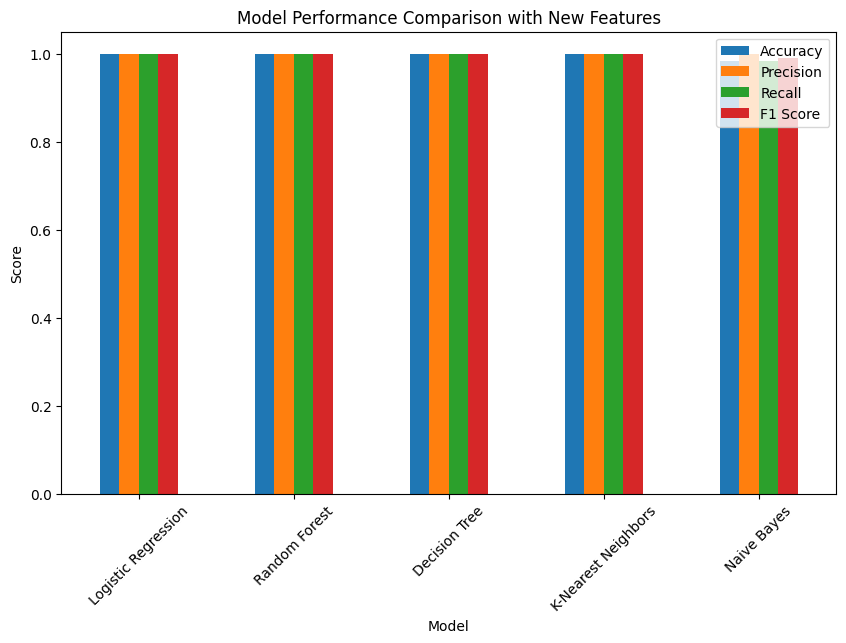

In [ ]:
# Add new feature (modify this as per your dataset's column names)
df['New_Feature'] = df['Amount'] * df['Time']  # Adjust as needed

# Re-run feature selection with the new feature
X_new = df.drop(columns=['Class'])
selector = SelectKBest(score_func=mutual_info_classif, k=15)
X_new_selected = selector.fit_transform(X_new, y)

# Get the new selected features
selected_features_new = X_new.columns[selector.get_support()]
print(f"Selected Features After Adding New Feature: {selected_features_new}")

# Standardizing the new selected features
scaler = StandardScaler()
X_new_scaled = scaler.fit_transform(X_new_selected)

# Split the data into training and test sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new_scaled, y, test_size=0.25, random_state=42, stratify=y)

# Train models with the new features
results_new = []
for name, model in models.items():
    model.fit(X_train_new, y_train_new)
    y_pred_new = model.predict(X_test_new)

    # Evaluation metrics
    accuracy_new = accuracy_score(y_test_new, y_pred_new)
    precision_new = precision_score(y_test_new, y_pred_new, average='weighted')
    recall_new = recall_score(y_test_new, y_pred_new, average='weighted')
    f1_new = f1_score(y_test_new, y_pred_new, average='weighted')

    results_new.append({
        'Model': name,
        'Accuracy': accuracy_new,
        'Precision': precision_new,
        'Recall': recall_new,
        'F1 Score': f1_new
    })

    # Classification Report and Confusion Matrix for each model
    print(f"\n{name} with New Feature Classification Report:")
    print(classification_report(y_test_new, y_pred_new))

    # Confusion Matrix Heatmap
    #cm_new = confusion_matrix(y_test_new, y_pred_new)
    #sns.heatmap(cm_new, annot=True, fmt='g', cmap="crest")
    #plt.title(f'{name} with New Feature - Confusion Matrix')
    #plt.xlabel('Predicted')
    #plt.ylabel('Actual')
    #plt.show()

# Summary of Model Performance with New Features
results_new_df = pd.DataFrame(results_new)
print("\nModel Performance with New Features:")
print(results_new_df)

# Plotting Model Performance with New Features
results_new_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison with New Features')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()


# **Evaluating Model Performance with the Addition of a New Feature**

Columns in dataframe: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'New_Feature'],
      dtype='object')
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V22       V23       V24       V25       V26  \
0  0.098698  0.363787  ...  0.277838 -0.110474  0.066928  0.128539 -0.189115   
1  0.085102 -0.255425  ... -0.638672  0.101288 -0.3

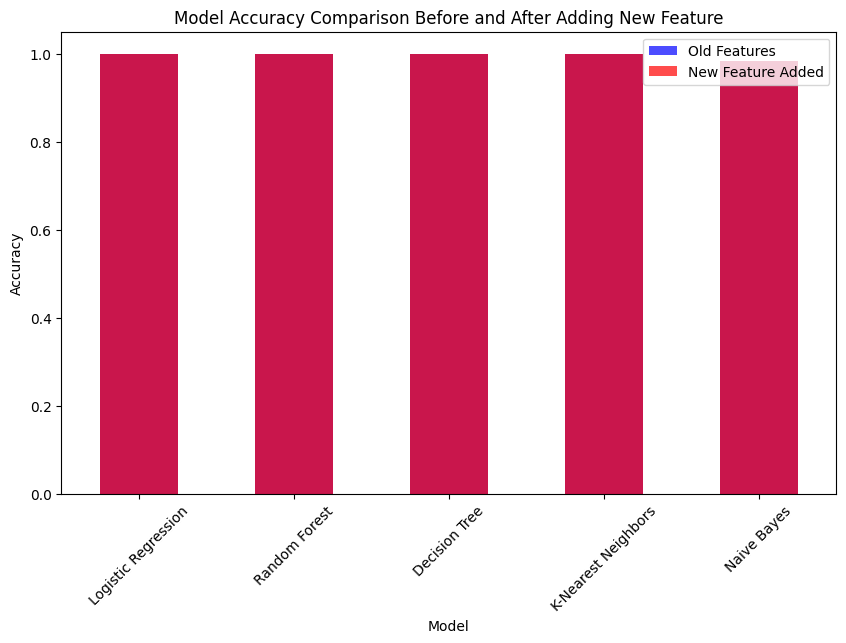

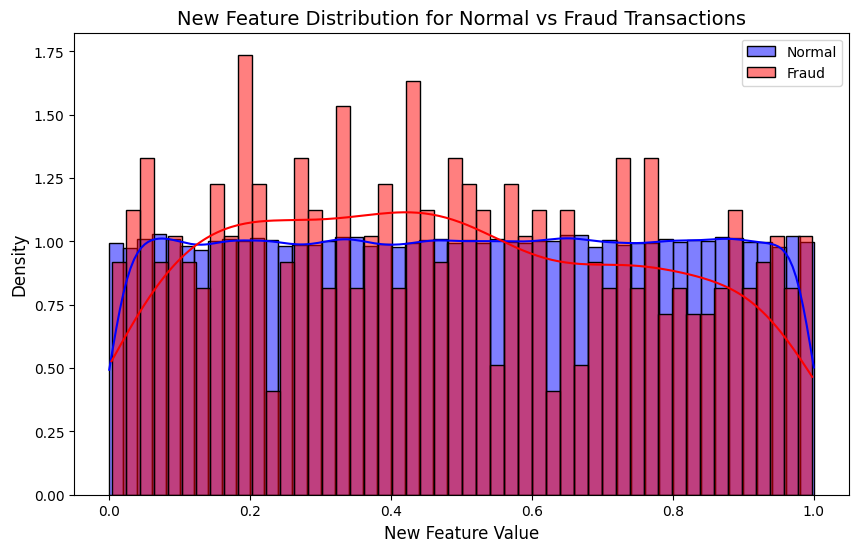

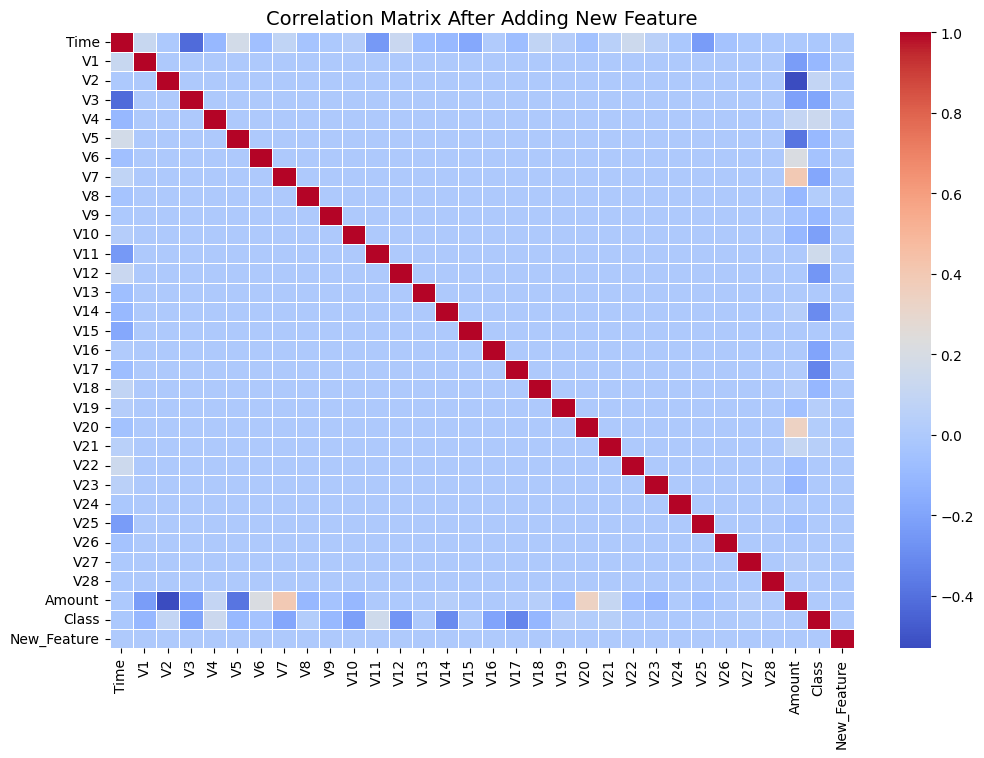

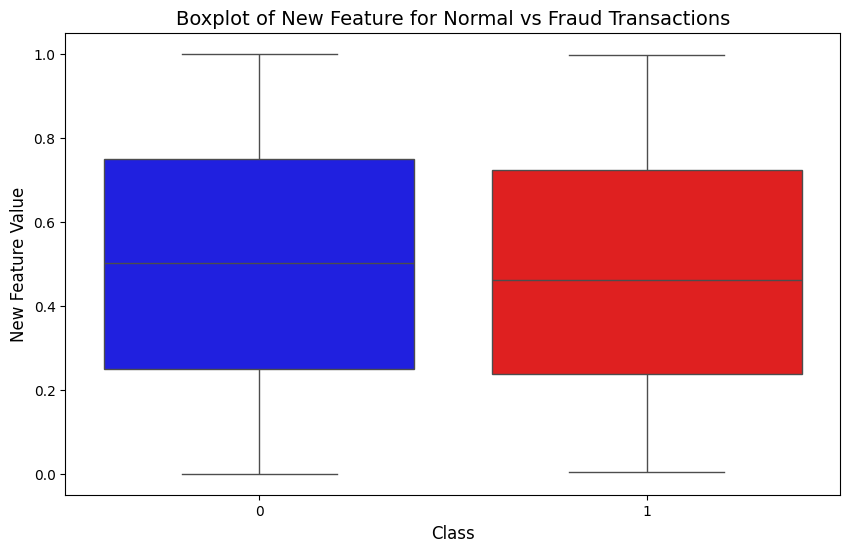

In [ ]:
# Add a new feature to the dataset (assuming 'New_Feature' is the new feature)
np.random.seed(42)
df['New_Feature'] = np.random.rand(len(df))  # Example of adding a random new feature

# Check if 'New_Feature' was added successfully
print("Columns in dataframe:", df.columns)
print(df.head())  # Print the first few rows to check if 'New_Feature' is added

# 2. Re-run feature selection with the new feature
X_new = df.drop(columns=['Class', 'Amount', 'Time'])  # Include the new feature in the dataset
y = df['Class']

# Select the top 15 features based on Mutual Information
feature_selector_new = SelectKBest(score_func=mutual_info_classif, k=15)  # Adjust k as needed
X_new_selected = feature_selector_new.fit_transform(X_new, y)

# Get the selected features
selected_features_new = X_new.columns[feature_selector_new.get_support()]
print(f"Selected Features After Adding New Feature: {selected_features_new}")

# 3. Standardize the new selected features
scaler = StandardScaler()
X_new_scaled = scaler.fit_transform(X_new_selected)

# 4. Split the data into training and test sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new_scaled, y, test_size=0.25, random_state=42, stratify=y)

# 5. Train the models again with the new features
results_new = []
for name, model in models.items():
    model.fit(X_train_new, y_train_new)
    y_pred_new = model.predict(X_test_new)

    # Evaluation metrics
    accuracy_new = accuracy_score(y_test_new, y_pred_new)
    precision_new = precision_score(y_test_new, y_pred_new, average='weighted')
    recall_new = recall_score(y_test_new, y_pred_new, average='weighted')
    f1_new = f1_score(y_test_new, y_pred_new, average='weighted')

    results_new.append({
        'Model': name,
        'Accuracy': accuracy_new,
        'Precision': precision_new,
        'Recall': recall_new,
        'F1 Score': f1_new
    })

    # Classification Report and Confusion Matrix for each model with the new feature
    print(f"\n{name} with New Feature Classification Report:")
    print(classification_report(y_test_new, y_pred_new))

    # Confusion Matrix Heatmap for each model with the new feature
    #cm_new = confusion_matrix(y_test_new, y_pred_new)
    #sns.heatmap(cm_new, annot=True, fmt='g', cmap="crest")
    #plt.title(f'{name} with New Feature - Confusion Matrix')
    #plt.xlabel('Predicted')
    #plt.ylabel('Actual')
    #plt.show()

# Summary of Model Performance with New Features
results_new_df = pd.DataFrame(results_new)
print("\nModel Performance with New Features:")
print(results_new_df)

# Plotting Model Performance Comparison (with and without new feature)
results_df.set_index('Model')['Accuracy'].plot(kind='bar', figsize=(10, 6), label='Old Features', alpha=0.7, color='blue')
results_new_df.set_index('Model')['Accuracy'].plot(kind='bar', figsize=(10, 6), label='New Feature Added', alpha=0.7, color='red')
plt.title('Model Accuracy Comparison Before and After Adding New Feature')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 6. Visualizing the Impact of the New Feature
# Plotting histogram of 'New_Feature' for normal vs fraud transactions
df_class_0 = df[df['Class'] == 0]
df_class_1 = df[df['Class'] == 1]

plt.figure(figsize=(10, 6))
sns.histplot(df_class_0['New_Feature'], kde=True, color='blue', label='Normal', stat='density', bins=50)
sns.histplot(df_class_1['New_Feature'], kde=True, color='red', label='Fraud', stat='density', bins=50)
plt.title('New Feature Distribution for Normal vs Fraud Transactions', fontsize=14)
plt.xlabel('New Feature Value', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.show()

# Plotting correlation matrix after adding the new feature
plt.figure(figsize=(12, 8))
corr_matrix_new = df.corr()  # Calculate correlation matrix
sns.heatmap(corr_matrix_new, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)  # annot=False to hide values
plt.title('Correlation Matrix After Adding New Feature', fontsize=14)
plt.show()

# Boxplot of 'New_Feature' for Normal vs Fraud transactions
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='New_Feature', data=df, hue='Class', palette={0: 'blue', 1: 'red'}, legend=False)
plt.title('Boxplot of New Feature for Normal vs Fraud Transactions', fontsize=14)
plt.xlabel('Class', fontsize=12)
plt.ylabel('New Feature Value', fontsize=12)
plt.show()


# **Model Evaluation: ROC and Precision-Recall Curves for Classification Models**

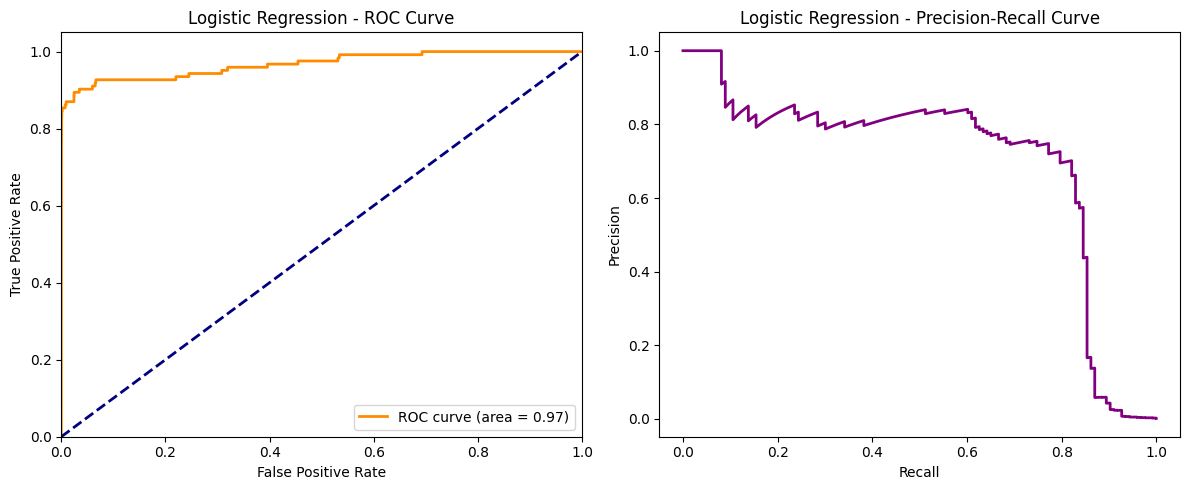

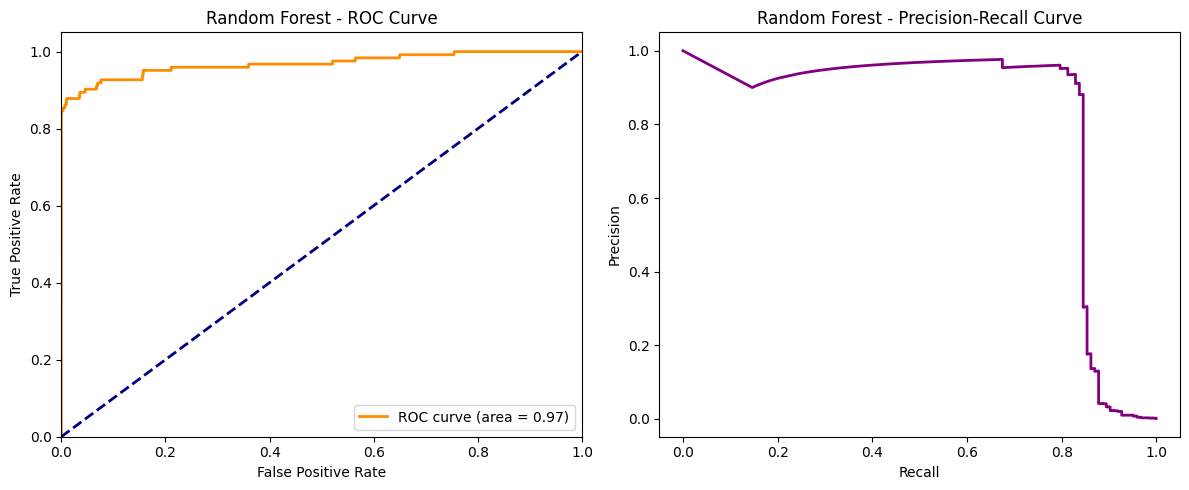

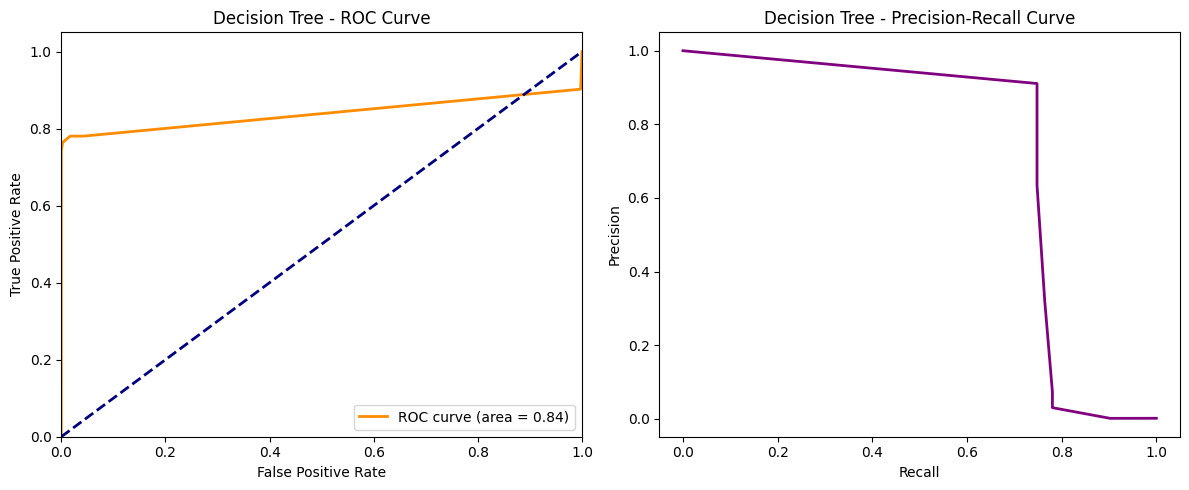

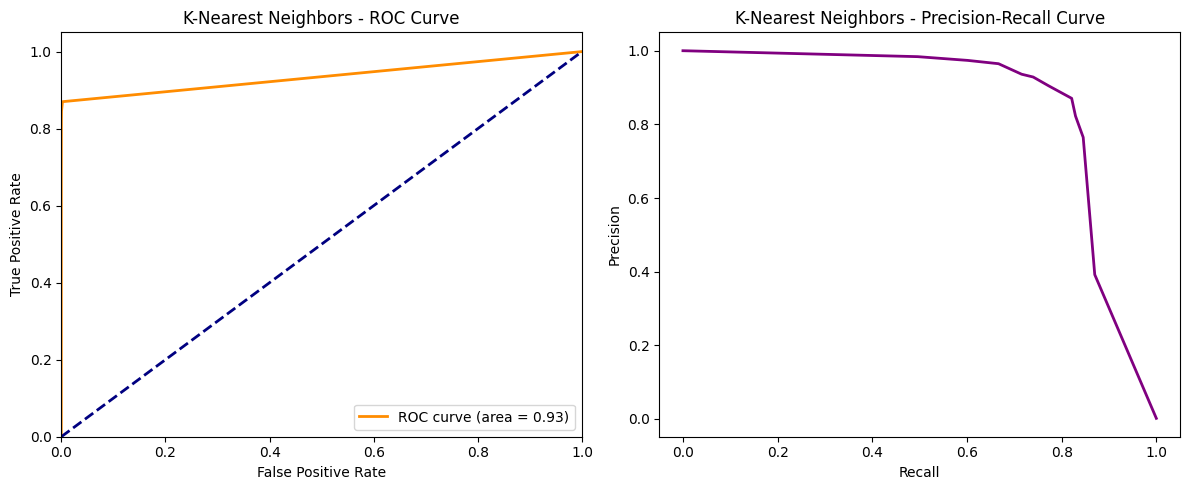

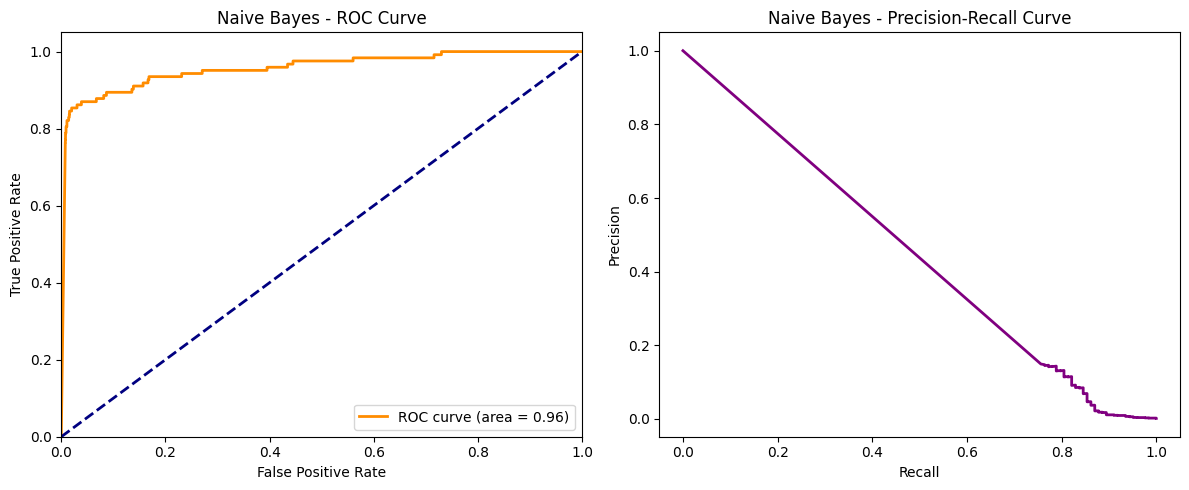

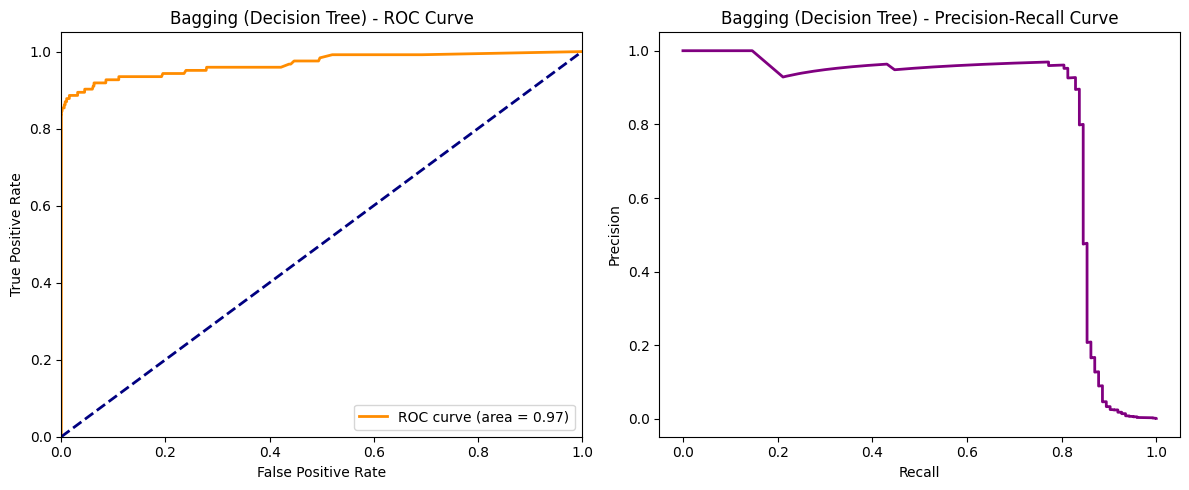

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Function to plot ROC and Precision-Recall curves for each model
def plot_evaluation_curves(model, X_test, y_test, model_name):
    # Predict probabilities for the positive class (1)
    y_proba = model.predict_proba(X_test)[:, 1]

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(12, 5))

    # Plot ROC Curve
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend(loc="lower right")

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, color='purple', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{model_name} - Precision-Recall Curve')

    plt.tight_layout()
    plt.show()

# Plot ROC and Precision-Recall curves for each model
for name, model in models.items():
    model.fit(X_train, y_train)
    plot_evaluation_curves(model, X_test, y_test, model_name=name)

# Plot curves for the Bagging model
plot_evaluation_curves(bagging_model, X_test, y_test, model_name='Bagging (Decision Tree)')


# **Evaluating Model Performance with Feature Selection: Impact of Top-K Features**

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import pandas as pd

# Initialize a list to store the results
feature_selection_results = []

# Define a function to evaluate models with selected features
def evaluate_with_selected_features(X, y, feature_selector, k, model):
    # Select top-k features
    selector = feature_selector(score_func=mutual_info_classif if feature_selector == SelectKBest else f_classif, k=k)
    X_selected = selector.fit_transform(X, y)
    selected_features = X.columns[selector.get_support()]

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.25, random_state=42, stratify=y)

    # Train the model
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, y_proba)

    # Store the results
    feature_selection_results.append({
        'Top Features': k,
        'Selected Features': list(selected_features),
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC': auc
    })

# Evaluate models using different feature sets
k_values = [5, 10, 15, 'all']  # Use different k values, or 'all' for using all features
model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)  # Example model (adjust as needed)

for k in k_values:
    if k == 'all':
        evaluate_with_selected_features(X, y, feature_selector=SelectKBest, k=X.shape[1], model=model)
    else:
        evaluate_with_selected_features(X, y, feature_selector=SelectKBest, k=k, model=model)

# Convert results to DataFrame for easy viewing
feature_selection_df = pd.DataFrame(feature_selection_results)
print(feature_selection_df)


   Top Features                                  Selected Features  Accuracy  \
0             5                          [V10, V11, V12, V14, V17]  0.999508   
1            10    [V3, V4, V9, V10, V11, V12, V14, V16, V17, V18]  0.999621   
2            15  [V2, V3, V4, V5, V7, V9, V10, V11, V12, V14, V...  0.999565   
3            30  [Time, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10...  0.999508   

   Precision    Recall  F1 Score       AUC  
0   0.999489  0.999508  0.999493  0.959138  
1   0.999611  0.999621  0.999605  0.969183  
2   0.999552  0.999565  0.999542  0.968345  
3   0.999489  0.999508  0.999483  0.965370  


# **Analyzing Model Performance with Varying Numbers of Selected Features**

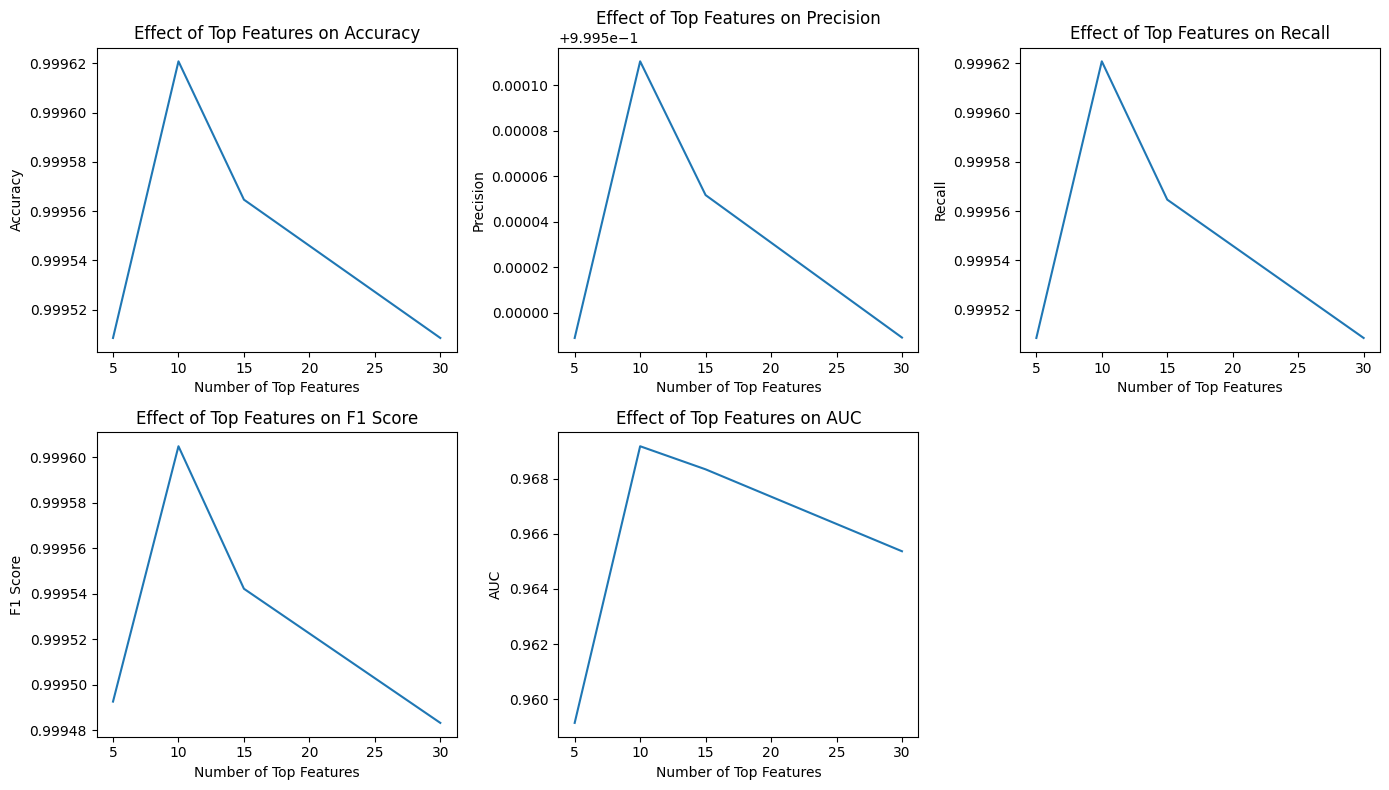

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the effect of different feature sets on performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']
plt.figure(figsize=(14, 8))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    sns.lineplot(data=feature_selection_df, x='Top Features', y=metric)
    plt.title(f'Effect of Top Features on {metric}')
    plt.xlabel('Number of Top Features')
    plt.ylabel(metric)
plt.tight_layout()
plt.show()


# **Model Evaluation and Testing on New Dataset with Feature Selection and Performance Metrics**

Selected Features After Adding New Feature: Index(['id', 'V2', 'V3', 'V4', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16',
       'V17', 'V18', 'V21', 'V27'],
      dtype='object')

Random Forest Classification Report on New Dataset:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       1.00      1.00      1.00     71079

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



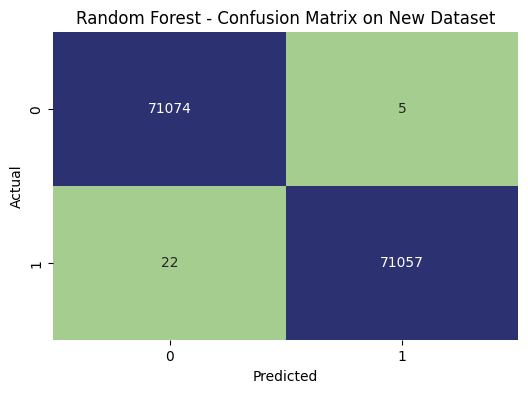


Gradient Boosting Classification Report on New Dataset:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       1.00      1.00      1.00     71079

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



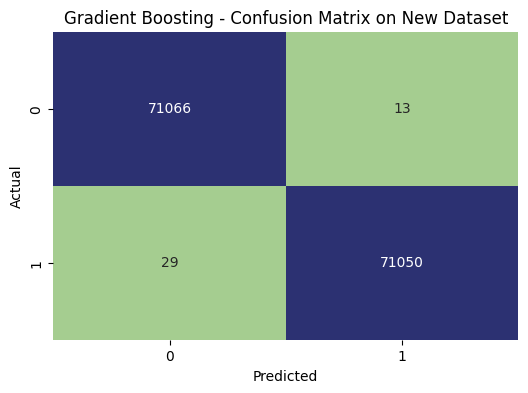


Logistic Regression Classification Report on New Dataset:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       1.00      1.00      1.00     71079

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



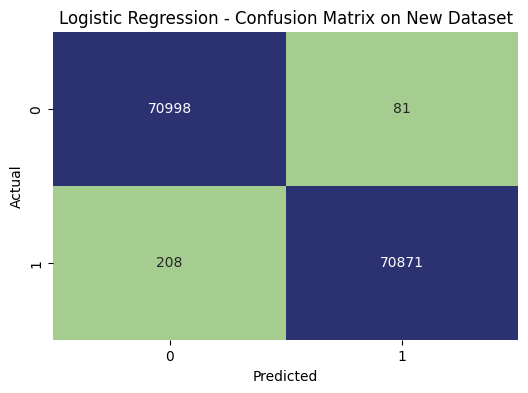


Model Performance on New Dataset:
                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0        Random Forest  0.999810   0.999810  0.999810  0.999810  0.999984
1    Gradient Boosting  0.999705   0.999705  0.999705  0.999705  0.999897
2  Logistic Regression  0.997967   0.997969  0.997967  0.997967  0.999786


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

# Load the new dataset
new_df = pd.read_csv('/content/creditcard_2023.csv')  # Replace with path to the new dataset

# Example of adding a feature if needed, adjust if New_Feature already exists in new_df
np.random.seed(42)
new_df['New_Feature'] = np.random.rand(len(new_df))  # Example new feature, replace as needed

# Ensure 'Class' column is clean and convert to integer
new_df['Class'] = new_df['Class'].replace([np.inf, -np.inf], np.nan)  # Replace inf with NaN
new_df = new_df.dropna(subset=['Class'])  # Drop rows with NaN in 'Class'
new_df['Class'] = new_df['Class'].astype(int)

# Separate features and target variable
columns_to_drop = ['Class', 'Amount', 'Time']
X_new = new_df.drop(columns=[col for col in columns_to_drop if col in new_df.columns])
y_new = new_df['Class'] # Adjust according to dataset



# Feature selection using Mutual Information, select top 15 features
feature_selector_new = SelectKBest(score_func=mutual_info_classif, k=15)
X_new_selected = feature_selector_new.fit_transform(X_new, y_new)
selected_features_new = X_new.columns[feature_selector_new.get_support()]
print(f"Selected Features After Adding New Feature: {selected_features_new}")

# Scale the selected features
scaler = StandardScaler()
X_new_scaled = scaler.fit_transform(X_new_selected)

# Split the new data into training and testing sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_new_scaled, y_new, test_size=0.25, random_state=42, stratify=y_new
)

# Define models to evaluate
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42)
}

# Train and evaluate models
results_new = []
for name, model in models.items():
    model.fit(X_train_new, y_train_new)
    y_pred_new = model.predict(X_test_new)

    # Calculate metrics
    accuracy_new = accuracy_score(y_test_new, y_pred_new)
    precision_new = precision_score(y_test_new, y_pred_new, average='weighted')
    recall_new = recall_score(y_test_new, y_pred_new, average='weighted')
    f1_new = f1_score(y_test_new, y_pred_new, average='weighted')
    roc_auc_new = roc_auc_score(y_test_new, model.predict_proba(X_test_new)[:, 1])

    # Store results
    results_new.append({
        'Model': name,
        'Accuracy': accuracy_new,
        'Precision': precision_new,
        'Recall': recall_new,
        'F1 Score': f1_new,
        'ROC AUC': roc_auc_new
    })

    # Classification Report and Confusion Matrix
    print(f"\n{name} Classification Report on New Dataset:")
    print(classification_report(y_test_new, y_pred_new))

    # Confusion Matrix Heatmap
    cm_new = confusion_matrix(y_test_new, y_pred_new)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_new, annot=True, fmt='g', cmap="crest", cbar=False)
    plt.title(f'{name} - Confusion Matrix on New Dataset')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Summary of model performance on the new dataset
results_new_df = pd.DataFrame(results_new)
print("\nModel Performance on New Dataset:")
print(results_new_df)

# Visualizing Model Performance Comparison for Accuracy (Old vs New)
# Assuming results_df contains metrics from original dataset
# Uncomment the following if you have `results_df` from previous model performance

# results_df.set_index('Model')['Accuracy'].plot(kind='bar', label='Original Dataset', alpha=0.7, color='blue')
# results_new_df.set_index('Model')['Accuracy'].plot(kind='bar', label='New Dataset', alpha=0.7, color='red')
# plt.title('Model Accuracy Comparison (Original vs New Dataset)')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.xticks(rotation=45)
# plt.show()
